In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import imageio
from skimage.io import imshow,imread

rband = imageio.imread('images/1.gif')
gband = imageio.imread('images/2.gif')
bband = imageio.imread('images/3.gif')
iband = imageio.imread('images/4.gif')


#pixr = np.array(rband)
#pixg = np.array(gband)
#pixb = np.array(bband)
#pixi = np.array(iband)

river = pd.read_csv("r.txt", header = None)
nonriver = pd.read_csv("nr.txt", header = None)

Xr = river.iloc[:,0:1].values
Yr = river.iloc[:,1:2].values

Xnr = nonriver.iloc[:,0:1].values
Ynr = nonriver.iloc[:,1:2].values


#print(xr)
'''plt.imshow(rband)
plt.show()
plt.imshow(gband)
plt.show()
plt.imshow(bband)
plt.show()
plt.imshow(iband)
plt.show()'''

'plt.imshow(rband)\nplt.show()\nplt.imshow(gband)\nplt.show()\nplt.imshow(bband)\nplt.show()\nplt.imshow(iband)\nplt.show()'

In [2]:
# Step 1

Rr = []
Gr = []
Br = []
Ir = []

for i in range(Xr.size):
    Rr.append(rband[Xr[i], Yr[i]])
    Gr.append(gband[Xr[i], Yr[i]])
    Br.append(bband[Xr[i], Yr[i]])
    Ir.append(iband[Xr[i], Yr[i]])
    
Rr = np.matrix(Rr)
Gr = np.matrix(Gr)
Br = np.matrix(Br)
Ir = np.matrix(Ir)
    
river_mean = [np.mean(Rr), np.mean(Gr), np.mean(Br), np.mean(Ir)]
river_mean = np.matrix(river_mean)
print(river_mean)

[[41.8  27.16 28.68 34.64]]


In [3]:
#Step 2

Rnr = []
Gnr = []
Bnr = []
Inr = []

for i in range(Xnr.size):
    Rnr.append(rband[Xnr[i], Ynr[i]])
    Gnr.append(gband[Xnr[i], Ynr[i]])
    Bnr.append(bband[Xnr[i], Ynr[i]])
    Inr.append(iband[Xnr[i], Ynr[i]])
    
#print(Rnr)
Rnr = np.matrix(Rnr)
Gnr = np.matrix(Gnr)
Bnr = np.matrix(Bnr)
Inr = np.matrix(Inr)
#print(Rnr)
    
nonriver_mean = [np.mean(Rnr), np.mean(Gnr), np.mean(Bnr), np.mean(Inr)]
nonriver_mean = np.matrix(nonriver_mean)
print((nonriver_mean))

[[40.32 25.75 26.3  35.26]]


In [4]:
# Covariance function
def cal_cov(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    s = []
    n = len(x)
    for i in range(n):
        temp1 = x[i] - x_mean
        temp2 = y[i] - y_mean
        s.append(temp1 * temp2)
        
    s = np.sum(s)
    s = s / (n-1)
    
    return s 

In [5]:
#step 3

river_cov = [[cal_cov(Rr, Rr), cal_cov(Rr, Gr), cal_cov(Rr, Br), cal_cov(Rr, Ir)],
             [cal_cov(Gr, Rr), cal_cov(Gr, Gr), cal_cov(Gr, Br), cal_cov(Gr, Ir)],
             [cal_cov(Br, Rr), cal_cov(Br, Gr), cal_cov(Br, Br), cal_cov(Br, Ir)],
             [cal_cov(Ir, Rr), cal_cov(Ir, Gr), cal_cov(Ir, Br), cal_cov(Ir, Ir)]]

river_cov = np.matrix(river_cov)
#print(river_cov)

In [6]:
#step 4

nonriver_cov = [[cal_cov(Rnr, Rnr), cal_cov(Rnr, Gnr), cal_cov(Rnr, Bnr), cal_cov(Rnr, Inr)],
             [cal_cov(Gnr, Rnr), cal_cov(Gnr, Gnr), cal_cov(Gnr, Bnr), cal_cov(Gnr, Inr)],
             [cal_cov(Bnr, Rnr), cal_cov(Bnr, Gnr), cal_cov(Bnr, Bnr), cal_cov(Bnr, Inr)],
             [cal_cov(Inr, Rnr), cal_cov(Inr, Gnr), cal_cov(Inr, Bnr), cal_cov(Inr, Inr)]]

nonriver_cov = np.matrix(river_cov)
#print(nonriver_cov)

In [7]:
#step 5, 6

#pixr = np.array(rband)
#pixg = np.array(gband)
#pixb = np.array(bband)
#pixi = np.array(iband)


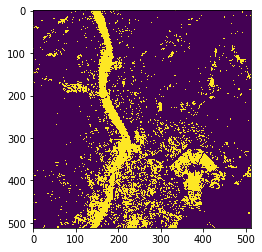

In [15]:
#step 7

out = []
P1 = 0.8
P2 = 0.2

for i in range(512):
    temp = []
    for j in range(512):
        test = [rband[i, j], gband[i, j], bband[i, j], iband[i, j]]
        test = np.matrix(test)
        
        test_r = test - river_mean
        test_nr = test - nonriver_mean
        
        
        river_cov_I = np.linalg.inv(river_cov)
        nonriver_cov_I = np.linalg.inv(nonriver_cov)
        
        #step 8
        river_class = test_r * river_cov_I * test_r.T
        #step 9
        nonriver_class = test_nr * nonriver_cov_I * test_nr.T
        
        det_river_cov = np.linalg.det(river_cov)
        det_nonriver_cov = np.linalg.det(nonriver_cov)
        sqrt_det_river = np.sqrt(det_river_cov)
        sqrt_det_nonriver = np.sqrt(det_nonriver_cov)
        
        #step 10
        p1 = (-0.5) * 1 / sqrt_det_river * np.exp(river_class)
        #step 11
        p2 = (-0.5) * 1 / sqrt_det_nonriver * np.exp(nonriver_class)
        
        #step 12
        if ((P1 * p1) >= (P2 * p2)):
            temp.append(255)
        else:
            temp.append(0)
    out.append(temp)

result = np.uint8(np.array(out))
imageio.imwrite('images/result.jpeg',output[:,:])
plt.imshow(output)
plt.show()